# 연령별 성별 선호도 분석

## #01. 패키지 참조

In [3]:
import sys
import seaborn as sb
import pandas as pd
import numpy as np
from pandas import read_excel, DataFrame, pivot_table, melt, crosstab
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer

In [4]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

In [5]:
origin = read_excel('#5.musinsadata_login_refine.xlsx')
origin

,상품번호,종류,분류,성별,가격,조회수(18세이하),조회수(19~23세),조회수(24~28세),조회수(29~33세),조회수(34~39세),...,조회수,구매수(18세이하),구매수(19~23세),구매수(24~28세),구매수(29~33세),구매수(34~39세),구매수(40세이상),남성 구매수,여성 구매수,구매수
0,2685576,14,62,0,249.00,0.034896,0.103114,0.207197,0.206228,0.140070,...,16506,0.014427,0.075744,0.240757,0.204689,0.146078,0.318305,0.472498,0.527502,1109
1,451851,13,47,1,268.00,0.055769,0.261692,0.289070,0.205018,0.097848,...,18774,0.018192,0.183059,0.325753,0.255259,0.135304,0.082433,0.905060,0.094940,1759
2,3276429,13,5,1,259.00,0.010966,0.178638,0.345433,0.268067,0.116076,...,18238,0.001676,0.075021,0.347443,0.377619,0.131182,0.067058,0.968986,0.031014,2386
3,595038,13,5,0,146.00,0.045262,0.253340,0.258896,0.187040,0.119678,...,16018,0.006934,0.179792,0.299158,0.234274,0.149579,0.130263,0.641407,0.358593,2019
4,1231944,9,108,0,139.00,0.085543,0.341216,0.265107,0.114992,0.066548,...,15688,0.022356,0.302617,0.338877,0.145038,0.074700,0.116412,0.435115,0.564885,3668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5739,3666394,3,102,2,89.00,0.148071,0.314392,0.246682,0.126296,0.046350,...,9644,0.100000,0.183333,0.300000,0.216667,0.016667,0.183333,0.066667,0.933333,60
5740,2697817,6,26,0,69.90,0.022466,0.093699,0.132603,0.150685,0.198356,...,1825,0.003650,0.113139,0.135036,0.204380,0.218978,0.324818,0.375912,0.624088,274
5741,2757362,6,122,0,38.00,0.202914,0.221198,0.228780,0.163817,0.083247,...,6727,0.126394,0.204461,0.245353,0.219331,0.074349,0.130112,0.754647,0.245353,269
5742,3220337,3,102,0,55.00,0.175500,0.249127,0.183751,0.143447,0.092669,...,3151,0.053638,0.242827,0.327235,0.202079,0.064033,0.110603,0.595842,0.404158,2405


## #02. 데이터 정제

#### (1) 종류의 조회수에 따른 연령별 정제

In [6]:
viewage_df = origin.filter(['종류','분류','조회수(18세이하)','조회수(19~23세)','조회수(24~28세)','조회수(29~33세)','조회수(34~39세)','조회수(40세이상)','조회수'],axis=1)
viewage_df

,종류,분류,조회수(18세이하),조회수(19~23세),조회수(24~28세),조회수(29~33세),조회수(34~39세),조회수(40세이상),조회수
0,14,62,0.034896,0.103114,0.207197,0.206228,0.140070,0.309281,16506
1,13,47,0.055769,0.261692,0.289070,0.205018,0.097848,0.091723,18774
2,13,5,0.010966,0.178638,0.345433,0.268067,0.116076,0.081423,18238
3,13,5,0.045262,0.253340,0.258896,0.187040,0.119678,0.136534,16018
4,9,108,0.085543,0.341216,0.265107,0.114992,0.066548,0.126976,15688
...,...,...,...,...,...,...,...,...,...
5739,3,102,0.148071,0.314392,0.246682,0.126296,0.046350,0.119245,9644
5740,6,26,0.022466,0.093699,0.132603,0.150685,0.198356,0.402740,1825
5741,6,122,0.202914,0.221198,0.228780,0.163817,0.083247,0.100193,6727
5742,3,102,0.175500,0.249127,0.183751,0.143447,0.092669,0.155506,3151


#### (2) 종류의 구매수에 따른 연령별 정제

In [18]:
buyage_df = origin.filter(['종류','분류','구매수(18세이하)','구매수(19~23세)','구매수(24~28세)','구매수(29~33세)','구매수(34~39세)','구매수(40세이상)','구매수'],axis=1)
buyage_df

,종류,분류,구매수(18세이하),구매수(19~23세),구매수(24~28세),구매수(29~33세),구매수(34~39세),구매수(40세이상),구매수
0,14,62,0.014427,0.075744,0.240757,0.204689,0.146078,0.318305,1109
1,13,47,0.018192,0.183059,0.325753,0.255259,0.135304,0.082433,1759
2,13,5,0.001676,0.075021,0.347443,0.377619,0.131182,0.067058,2386
3,13,5,0.006934,0.179792,0.299158,0.234274,0.149579,0.130263,2019
4,9,108,0.022356,0.302617,0.338877,0.145038,0.074700,0.116412,3668
...,...,...,...,...,...,...,...,...,...
5739,3,102,0.100000,0.183333,0.300000,0.216667,0.016667,0.183333,60
5740,6,26,0.003650,0.113139,0.135036,0.204380,0.218978,0.324818,274
5741,6,122,0.126394,0.204461,0.245353,0.219331,0.074349,0.130112,269
5742,3,102,0.053638,0.242827,0.327235,0.202079,0.064033,0.110603,2405


In [96]:
all_type_df = origin.filter(['상품번호','종류','분류','조회수(18세이하)','조회수(19~23세)','조회수(24~28세)','조회수(29~33세)','조회수(34~39세)','조회수(40세이상)','조회수','구매수(18세이하)','구매수(19~23세)','구매수(24~28세)','구매수(29~33세)','구매수(34~39세)','구매수(40세이상)','구매수'],axis=1)
all_type_df

,상품번호,종류,분류,조회수(18세이하),조회수(19~23세),조회수(24~28세),조회수(29~33세),조회수(34~39세),조회수(40세이상),조회수,구매수(18세이하),구매수(19~23세),구매수(24~28세),구매수(29~33세),구매수(34~39세),구매수(40세이상),구매수
0,2685576,14,62,0.034896,0.103114,0.207197,0.206228,0.140070,0.309281,16506,0.014427,0.075744,0.240757,0.204689,0.146078,0.318305,1109
1,451851,13,47,0.055769,0.261692,0.289070,0.205018,0.097848,0.091723,18774,0.018192,0.183059,0.325753,0.255259,0.135304,0.082433,1759
2,3276429,13,5,0.010966,0.178638,0.345433,0.268067,0.116076,0.081423,18238,0.001676,0.075021,0.347443,0.377619,0.131182,0.067058,2386
3,595038,13,5,0.045262,0.253340,0.258896,0.187040,0.119678,0.136534,16018,0.006934,0.179792,0.299158,0.234274,0.149579,0.130263,2019
4,1231944,9,108,0.085543,0.341216,0.265107,0.114992,0.066548,0.126976,15688,0.022356,0.302617,0.338877,0.145038,0.074700,0.116412,3668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5739,3666394,3,102,0.148071,0.314392,0.246682,0.126296,0.046350,0.119245,9644,0.100000,0.183333,0.300000,0.216667,0.016667,0.183333,60
5740,2697817,6,26,0.022466,0.093699,0.132603,0.150685,0.198356,0.402740,1825,0.003650,0.113139,0.135036,0.204380,0.218978,0.324818,274
5741,2757362,6,122,0.202914,0.221198,0.228780,0.163817,0.083247,0.100193,6727,0.126394,0.204461,0.245353,0.219331,0.074349,0.130112,269
5742,3220337,3,102,0.175500,0.249127,0.183751,0.143447,0.092669,0.155506,3151,0.053638,0.242827,0.327235,0.202079,0.064033,0.110603,2405


In [97]:
all_type_df['18세이하 조회'] = all_type_df['조회수(18세이하)']* all_type_df['조회수']
all_type_df['20대초 조회'] = all_type_df['조회수(19~23세)']* all_type_df['조회수']
all_type_df['20대중 조회'] = all_type_df['조회수(24~28세)'] * all_type_df['조회수']
all_type_df['20대후 30대초 조회'] = all_type_df['조회수(29~33세)'] * all_type_df['조회수']
all_type_df['30대중후 조회'] = all_type_df['조회수(34~39세)'] * all_type_df['조회수']
all_type_df['40대이상 조회'] = all_type_df['조회수(40세이상)'] * all_type_df['조회수']
all_type_df['18세이하 구매'] = all_type_df['구매수(18세이하)']* all_type_df['구매수']
all_type_df['20대초 구매'] = all_type_df['구매수(19~23세)']* all_type_df['구매수']
all_type_df['20대중 구매'] = all_type_df['구매수(24~28세)'] * all_type_df['구매수']
all_type_df['20대후 30대초 구매'] = all_type_df['구매수(29~33세)'] * all_type_df['구매수']
all_type_df['30대중후 구매'] = all_type_df['구매수(34~39세)'] * all_type_df['구매수']
all_type_df['40대이상 구매'] = all_type_df['구매수(40세이상)'] * all_type_df['구매수']
all_type_df


,상품번호,종류,분류,조회수(18세이하),조회수(19~23세),조회수(24~28세),조회수(29~33세),조회수(34~39세),조회수(40세이상),조회수,...,20대중 조회,20대후 30대초 조회,30대중후 조회,40대이상 조회,18세이하 구매,20대초 구매,20대중 구매,20대후 30대초 구매,30대중후 구매,40대이상 구매
0,2685576,14,62,0.034896,0.103114,0.207197,0.206228,0.140070,0.309281,16506,...,3420.0,3404.0,2312.0,5105.0,16.0,84.0,267.0,227.0,162.0,353.0
1,451851,13,47,0.055769,0.261692,0.289070,0.205018,0.097848,0.091723,18774,...,5427.0,3849.0,1837.0,1722.0,32.0,322.0,573.0,449.0,238.0,145.0
2,3276429,13,5,0.010966,0.178638,0.345433,0.268067,0.116076,0.081423,18238,...,6300.0,4889.0,2117.0,1485.0,4.0,179.0,829.0,901.0,313.0,160.0
3,595038,13,5,0.045262,0.253340,0.258896,0.187040,0.119678,0.136534,16018,...,4147.0,2996.0,1917.0,2187.0,14.0,363.0,604.0,473.0,302.0,263.0
4,1231944,9,108,0.085543,0.341216,0.265107,0.114992,0.066548,0.126976,15688,...,4159.0,1804.0,1044.0,1992.0,82.0,1110.0,1243.0,532.0,274.0,427.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5739,3666394,3,102,0.148071,0.314392,0.246682,0.126296,0.046350,0.119245,9644,...,2379.0,1218.0,447.0,1150.0,6.0,11.0,18.0,13.0,1.0,11.0
5740,2697817,6,26,0.022466,0.093699,0.132603,0.150685,0.198356,0.402740,1825,...,242.0,275.0,362.0,735.0,1.0,31.0,37.0,56.0,60.0,89.0
5741,2757362,6,122,0.202914,0.221198,0.228780,0.163817,0.083247,0.100193,6727,...,1539.0,1102.0,560.0,674.0,34.0,55.0,66.0,59.0,20.0,35.0
5742,3220337,3,102,0.175500,0.249127,0.183751,0.143447,0.092669,0.155506,3151,...,579.0,452.0,292.0,490.0,129.0,584.0,787.0,486.0,154.0,266.0


In [98]:
new_type_df= all_type_df.drop(['조회수(18세이하)','조회수(19~23세)','조회수(24~28세)','조회수(29~33세)','조회수(34~39세)','조회수(40세이상)','구매수(18세이하)','구매수(19~23세)','구매수(24~28세)','구매수(29~33세)','구매수(34~39세)','구매수(40세이상)'],axis=1)
# new_type_df.to_excel("#6.musinsadata_refine_excel.xlsx",index=False)
new_type_df

,상품번호,종류,분류,조회수,구매수,18세이하 조회,20대초 조회,20대중 조회,20대후 30대초 조회,30대중후 조회,40대이상 조회,18세이하 구매,20대초 구매,20대중 구매,20대후 30대초 구매,30대중후 구매,40대이상 구매
0,2685576,14,62,16506,1109,576.0,1702.0,3420.0,3404.0,2312.0,5105.0,16.0,84.0,267.0,227.0,162.0,353.0
1,451851,13,47,18774,1759,1047.0,4913.0,5427.0,3849.0,1837.0,1722.0,32.0,322.0,573.0,449.0,238.0,145.0
2,3276429,13,5,18238,2386,200.0,3258.0,6300.0,4889.0,2117.0,1485.0,4.0,179.0,829.0,901.0,313.0,160.0
3,595038,13,5,16018,2019,725.0,4058.0,4147.0,2996.0,1917.0,2187.0,14.0,363.0,604.0,473.0,302.0,263.0
4,1231944,9,108,15688,3668,1342.0,5353.0,4159.0,1804.0,1044.0,1992.0,82.0,1110.0,1243.0,532.0,274.0,427.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5739,3666394,3,102,9644,60,1428.0,3032.0,2379.0,1218.0,447.0,1150.0,6.0,11.0,18.0,13.0,1.0,11.0
5740,2697817,6,26,1825,274,41.0,171.0,242.0,275.0,362.0,735.0,1.0,31.0,37.0,56.0,60.0,89.0
5741,2757362,6,122,6727,269,1365.0,1488.0,1539.0,1102.0,560.0,674.0,34.0,55.0,66.0,59.0,20.0,35.0
5742,3220337,3,102,3151,2405,553.0,785.0,579.0,452.0,292.0,490.0,129.0,584.0,787.0,486.0,154.0,266.0


#### (3) 확인용 정제

In [10]:
check_df = origin.filter(['조회수(18세이하)','조회수(19~23세)','조회수(24~28세)','조회수(29~33세)','조회수(34~39세)','조회수(40세이상)','조회수','구매수(18세이하)','구매수(19~23세)','구매수(24~28세)','구매수(29~33세)','구매수(34~39세)','구매수(40세이상)','구매수'],axis=1)
check_df

,조회수(18세이하),조회수(19~23세),조회수(24~28세),조회수(29~33세),조회수(34~39세),조회수(40세이상),조회수,구매수(18세이하),구매수(19~23세),구매수(24~28세),구매수(29~33세),구매수(34~39세),구매수(40세이상),구매수
0,0.034896,0.103114,0.207197,0.206228,0.140070,0.309281,16506,0.014427,0.075744,0.240757,0.204689,0.146078,0.318305,1109
1,0.055769,0.261692,0.289070,0.205018,0.097848,0.091723,18774,0.018192,0.183059,0.325753,0.255259,0.135304,0.082433,1759
2,0.010966,0.178638,0.345433,0.268067,0.116076,0.081423,18238,0.001676,0.075021,0.347443,0.377619,0.131182,0.067058,2386
3,0.045262,0.253340,0.258896,0.187040,0.119678,0.136534,16018,0.006934,0.179792,0.299158,0.234274,0.149579,0.130263,2019
4,0.085543,0.341216,0.265107,0.114992,0.066548,0.126976,15688,0.022356,0.302617,0.338877,0.145038,0.074700,0.116412,3668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5739,0.148071,0.314392,0.246682,0.126296,0.046350,0.119245,9644,0.100000,0.183333,0.300000,0.216667,0.016667,0.183333,60
5740,0.022466,0.093699,0.132603,0.150685,0.198356,0.402740,1825,0.003650,0.113139,0.135036,0.204380,0.218978,0.324818,274
5741,0.202914,0.221198,0.228780,0.163817,0.083247,0.100193,6727,0.126394,0.204461,0.245353,0.219331,0.074349,0.130112,269
5742,0.175500,0.249127,0.183751,0.143447,0.092669,0.155506,3151,0.053638,0.242827,0.327235,0.202079,0.064033,0.110603,2405


#### (4) 데이터 변환

In [23]:
viewage_df['18세이하 조회'] = viewage_df['조회수(18세이하)']* viewage_df['조회수']
viewage_df['20대초 조회'] = viewage_df['조회수(19~23세)']* viewage_df['조회수']
viewage_df['20대중 조회'] = viewage_df['조회수(24~28세)'] * viewage_df['조회수']
viewage_df['20대후 30대초 조회'] = viewage_df['조회수(29~33세)'] * viewage_df['조회수']
viewage_df['30대중후 조회'] = viewage_df['조회수(34~39세)'] * viewage_df['조회수']
viewage_df['40대이상 조회'] = viewage_df['조회수(40세이상)'] * viewage_df['조회수']
viewage_df

,종류,분류,조회수(18세이하),조회수(19~23세),조회수(24~28세),조회수(29~33세),조회수(34~39세),조회수(40세이상),조회수,18세이하 조회,20대초 조회,20대중 조회,20대후 30대초 조회,30대중후 조회,40대이상 조회
0,14,62,0.034896,0.103114,0.207197,0.206228,0.140070,0.309281,16506,576.0,1702.0,3420.0,3404.0,2312.0,5105.0
1,13,47,0.055769,0.261692,0.289070,0.205018,0.097848,0.091723,18774,1047.0,4913.0,5427.0,3849.0,1837.0,1722.0
2,13,5,0.010966,0.178638,0.345433,0.268067,0.116076,0.081423,18238,200.0,3258.0,6300.0,4889.0,2117.0,1485.0
3,13,5,0.045262,0.253340,0.258896,0.187040,0.119678,0.136534,16018,725.0,4058.0,4147.0,2996.0,1917.0,2187.0
4,9,108,0.085543,0.341216,0.265107,0.114992,0.066548,0.126976,15688,1342.0,5353.0,4159.0,1804.0,1044.0,1992.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5739,3,102,0.148071,0.314392,0.246682,0.126296,0.046350,0.119245,9644,1428.0,3032.0,2379.0,1218.0,447.0,1150.0
5740,6,26,0.022466,0.093699,0.132603,0.150685,0.198356,0.402740,1825,41.0,171.0,242.0,275.0,362.0,735.0
5741,6,122,0.202914,0.221198,0.228780,0.163817,0.083247,0.100193,6727,1365.0,1488.0,1539.0,1102.0,560.0,674.0
5742,3,102,0.175500,0.249127,0.183751,0.143447,0.092669,0.155506,3151,553.0,785.0,579.0,452.0,292.0,490.0


In [24]:
buyage_df['18세이하 구매'] = buyage_df['구매수(18세이하)']* buyage_df['구매수']
buyage_df['20대초 구매'] = buyage_df['구매수(19~23세)']* buyage_df['구매수']
buyage_df['20대중 구매'] = buyage_df['구매수(24~28세)'] * buyage_df['구매수']
buyage_df['20대후 30대초 구매'] = buyage_df['구매수(29~33세)'] * buyage_df['구매수']
buyage_df['30대중후 구매'] = buyage_df['구매수(34~39세)'] * buyage_df['구매수']
buyage_df['40대이상 구매'] = buyage_df['구매수(40세이상)'] * buyage_df['구매수']
buyage_df

,종류,분류,구매수(18세이하),구매수(19~23세),구매수(24~28세),구매수(29~33세),구매수(34~39세),구매수(40세이상),구매수,18세이하 구매,20대초 구매,20대중 구매,20대후 30대초 구매,30대중후 구매,40대이상 구매
0,14,62,0.014427,0.075744,0.240757,0.204689,0.146078,0.318305,1109,16.0,84.0,267.0,227.0,162.0,353.0
1,13,47,0.018192,0.183059,0.325753,0.255259,0.135304,0.082433,1759,32.0,322.0,573.0,449.0,238.0,145.0
2,13,5,0.001676,0.075021,0.347443,0.377619,0.131182,0.067058,2386,4.0,179.0,829.0,901.0,313.0,160.0
3,13,5,0.006934,0.179792,0.299158,0.234274,0.149579,0.130263,2019,14.0,363.0,604.0,473.0,302.0,263.0
4,9,108,0.022356,0.302617,0.338877,0.145038,0.074700,0.116412,3668,82.0,1110.0,1243.0,532.0,274.0,427.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5739,3,102,0.100000,0.183333,0.300000,0.216667,0.016667,0.183333,60,6.0,11.0,18.0,13.0,1.0,11.0
5740,6,26,0.003650,0.113139,0.135036,0.204380,0.218978,0.324818,274,1.0,31.0,37.0,56.0,60.0,89.0
5741,6,122,0.126394,0.204461,0.245353,0.219331,0.074349,0.130112,269,34.0,55.0,66.0,59.0,20.0,35.0
5742,3,102,0.053638,0.242827,0.327235,0.202079,0.064033,0.110603,2405,129.0,584.0,787.0,486.0,154.0,266.0


#### (4) 데이터 생성

In [25]:
view_df = viewage_df.groupby(['종류','분류'],as_index=False)[['18세이하 조회', '20대초 조회', '20대중 조회','20대후 30대초 조회', '30대중후 조회','40대이상 조회']].sum()
buy_df = buyage_df.groupby(['종류','분류'],as_index=False)[['18세이하 구매', '20대초 구매', '20대중 구매','20대후 30대초 구매', '30대중후 구매','40대이상 구매']].sum()

## #02.히트맵

<Axes: >

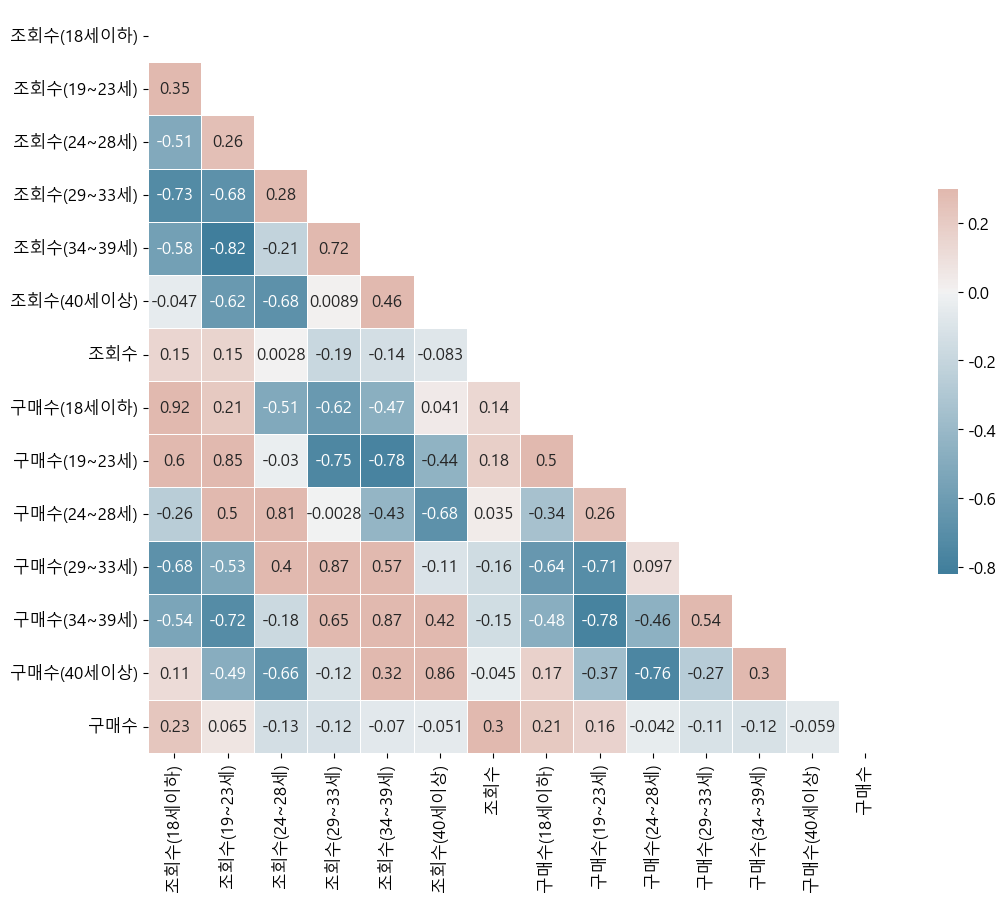

In [26]:
origin_crr = check_df.corr

#from string import ascii_letters
import numpy as np
import matplotlib.pyplot as plt

#sb.set_theme(style="white")


# Compute the correlation matrix
corr = check_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask = mask,annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## #03.시각화 - 파이그래프

### [1] 조회수에 따른 10대 선호상품

In [27]:
age_1 = view_df.groupby('종류').sum()
age_1.sort_values(by='18세이하 조회', ascending=False, inplace=True)
age1 = age_1.head(10)
print(age1)

age_2 = view_df.groupby('분류').sum()
age_2.sort_values(by='18세이하 조회', ascending=False, inplace=True)
age_2
age2 = age_2.head(10)

# print(age2)

      분류   18세이하 조회    20대초 조회    20대중 조회  20대후 30대초 조회  30대중후 조회   40대이상 조회
종류                                                                          
6    436  1215550.0  1824363.0  1804824.0     1226079.0  643928.0  1093136.0
3    433   685200.0  1361380.0  1404468.0     1072480.0  642564.0   920378.0
14  1257   683295.0  1869720.0  2063819.0     1468682.0  832346.0  1327048.0
9    208   160368.0   455588.0   573777.0      445898.0  279832.0   506645.0
0    721    96670.0   231348.0   224055.0      139880.0   82326.0   191159.0
2    412    74304.0   223995.0   177241.0      109262.0   60170.0    90889.0
13   527    71138.0   368475.0   475040.0      352522.0  200162.0   243022.0
11   739    61397.0   161553.0   217336.0      187614.0  125012.0   192185.0
15   351    53795.0   178545.0   170656.0       92657.0   42043.0    60438.0
5    711    50745.0   111031.0   121717.0       76817.0   48275.0    69862.0


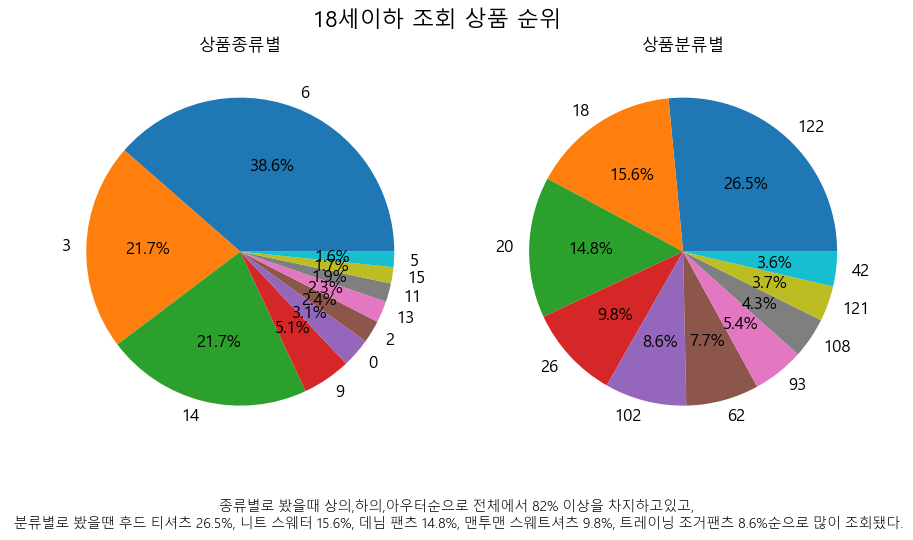

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# 전체 제목
fig.suptitle('18세이하 조회 상품 순위', fontsize=16, color='#000000')
plt.subplots_adjust(wspace = -0.6, hspace = 0.5)

ax1.pie(age1['18세이하 조회'], labels=age1.index, autopct='%0.1f%%')
ax1.title.set_text("상품종류별")
ax1.title.set_fontsize(12)
ax1.grid()

ax2.pie(age2['18세이하 조회'], labels=age2.index, autopct='%0.1f%%')
ax2.title.set_text("상품분류별")
ax2.title.set_fontsize(12)
plt.grid()

txt = "종류별로 봤을때 상의,하의,아우터순으로 전체에서 82% 이상을 차지하고있고,\n 분류별로 봤을땐 후드 티셔츠 26.5%, 니트 스웨터 15.6%, 데님 팬츠 14.8%, 맨투맨 스웨트셔츠 9.8%, 트레이닝 조거팬츠 8.6%순으로 많이 조회됐다."
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 10, "weight": "light"})
plt.show()
plt.close()

#### 10대 종류 조회수 top3에 따른 분류비율

In [29]:
# view_df.dtypes
teen_1 = view_df[view_df['종류'] == 6].sort_values(by='18세이하 조회',ascending=False)
teen_2 = view_df[view_df['종류'] == 3].sort_values(by='18세이하 조회',ascending=False)
teen_3 = view_df[view_df['종류'] == 14].sort_values(by='18세이하 조회',ascending=False)
teen_1

,종류,분류,18세이하 조회,20대초 조회,20대중 조회,20대후 30대초 조회,30대중후 조회,40대이상 조회
45,6,122,586748.0,518697.0,393130.0,253978.0,151995.0,404586.0
39,6,18,345788.0,807960.0,892559.0,579460.0,259857.0,363807.0
40,6,26,216733.0,313674.0,339655.0,269147.0,168517.0,252789.0
43,6,59,27108.0,95210.0,107233.0,76586.0,40158.0,38719.0
38,6,14,21585.0,56783.0,41736.0,22635.0,11063.0,18079.0
37,6,9,9764.0,11077.0,12058.0,11951.0,6100.0,6254.0
42,6,39,4250.0,12066.0,11657.0,7945.0,4341.0,6442.0
44,6,112,2294.0,4268.0,4616.0,3549.0,1673.0,2016.0
41,6,37,1280.0,4628.0,2180.0,828.0,224.0,444.0


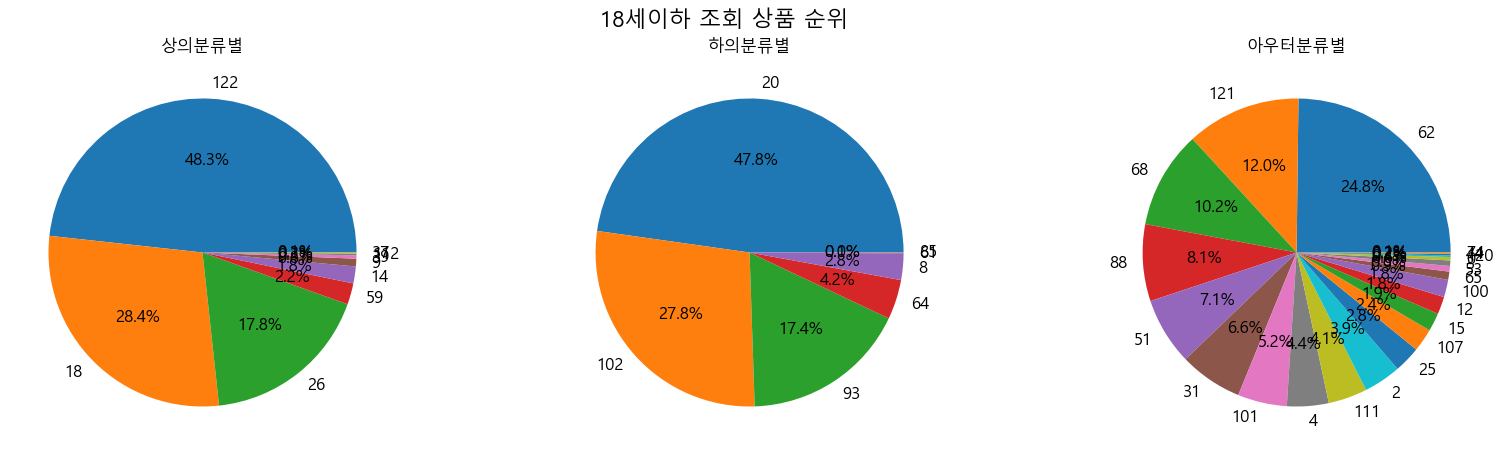

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

# 전체 제목
fig.suptitle('18세이하 조회 상품 순위', fontsize=16, color='#000000')
# plt.subplots_adjust(wspace = -0.6, hspace = 0.5)

ax1.pie(teen_1['18세이하 조회'], labels=teen_1['분류'], autopct='%0.1f%%')
ax1.title.set_text("상의분류별")
ax1.title.set_fontsize(12)
ax1.grid()

ax2.pie(teen_2['18세이하 조회'], labels=teen_2['분류'], autopct='%0.1f%%')
ax2.title.set_text("하의분류별")
ax2.title.set_fontsize(12)
ax2.grid()

ax3.pie(teen_3['18세이하 조회'], labels=teen_3['분류'], autopct='%0.1f%%')
ax3.title.set_text("아우터분류별")
ax3.title.set_fontsize(12)
plt.grid()

txt = ""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 10, "weight": "light"})
plt.show()
plt.close()

### [2] 조회수에 따른 20대초 선호상품

In [31]:
age_1 = view_df.groupby('종류').sum()
age_1.sort_values(by='20대초 조회', ascending=False, inplace=True)
age1 = age_1.head(10)
print(age1)

age_2 = view_df.groupby('분류').sum()
age_2.sort_values(by='20대초 조회', ascending=False, inplace=True)
age_2
age2 = age_2.head(10)

# print(age2)

      분류   18세이하 조회    20대초 조회    20대중 조회  20대후 30대초 조회  30대중후 조회   40대이상 조회
종류                                                                          
14  1257   683295.0  1869720.0  2063819.0     1468682.0  832346.0  1327048.0
6    436  1215550.0  1824363.0  1804824.0     1226079.0  643928.0  1093136.0
3    433   685200.0  1361380.0  1404468.0     1072480.0  642564.0   920378.0
9    208   160368.0   455588.0   573777.0      445898.0  279832.0   506645.0
13   527    71138.0   368475.0   475040.0      352522.0  200162.0   243022.0
17   479    48894.0   334252.0   291124.0      136355.0   53583.0    91097.0
0    721    96670.0   231348.0   224055.0      139880.0   82326.0   191159.0
2    412    74304.0   223995.0   177241.0      109262.0   60170.0    90889.0
15   351    53795.0   178545.0   170656.0       92657.0   42043.0    60438.0
11   739    61397.0   161553.0   217336.0      187614.0  125012.0   192185.0


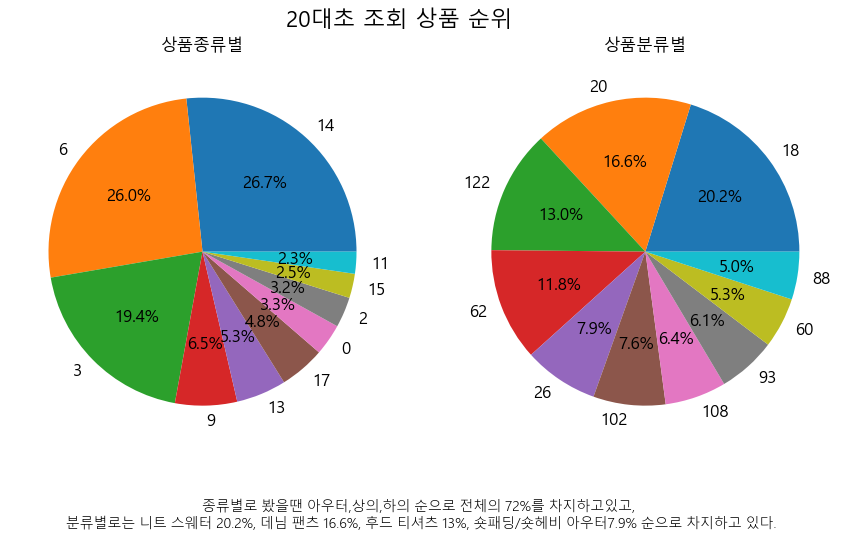

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# 전체 제목
fig.suptitle('20대초 조회 상품 순위', fontsize=16, color='#000000')
plt.subplots_adjust(wspace = -0.6, hspace = 0.5)

ax1.pie(age1['20대초 조회'], labels=age1.index, autopct='%0.1f%%')
ax1.title.set_text("상품종류별")
ax1.title.set_fontsize(12)
ax1.grid()

ax2.pie(age2['20대초 조회'], labels=age2.index, autopct='%0.1f%%')
ax2.title.set_text("상품분류별")
ax2.title.set_fontsize(12)
plt.grid()

txt = "종류별로 봤을땐 아우터,상의,하의 순으로 전체의 72%를 차지하고있고,\n 분류별로는 니트 스웨터 20.2%, 데님 팬츠 16.6%, 후드 티셔츠 13%, 숏패딩/숏헤비 아우터7.9% 순으로 차지하고 있다."
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 10, "weight": "light"})
plt.show()
plt.close()

#### 20대초 종류 조회수 top3에 따른 분류비율

In [33]:
twen_1 = view_df[view_df['종류'] == 14].sort_values(by='20대초 조회',ascending=False)
twen_2 = view_df[view_df['종류'] == 6].sort_values(by='20대초 조회',ascending=False)
twen_3 = view_df[view_df['종류'] == 3].sort_values(by='20대초 조회',ascending=False)
twen_2

,종류,분류,18세이하 조회,20대초 조회,20대중 조회,20대후 30대초 조회,30대중후 조회,40대이상 조회
39,6,18,345788.0,807960.0,892559.0,579460.0,259857.0,363807.0
45,6,122,586748.0,518697.0,393130.0,253978.0,151995.0,404586.0
40,6,26,216733.0,313674.0,339655.0,269147.0,168517.0,252789.0
43,6,59,27108.0,95210.0,107233.0,76586.0,40158.0,38719.0
38,6,14,21585.0,56783.0,41736.0,22635.0,11063.0,18079.0
42,6,39,4250.0,12066.0,11657.0,7945.0,4341.0,6442.0
37,6,9,9764.0,11077.0,12058.0,11951.0,6100.0,6254.0
41,6,37,1280.0,4628.0,2180.0,828.0,224.0,444.0
44,6,112,2294.0,4268.0,4616.0,3549.0,1673.0,2016.0


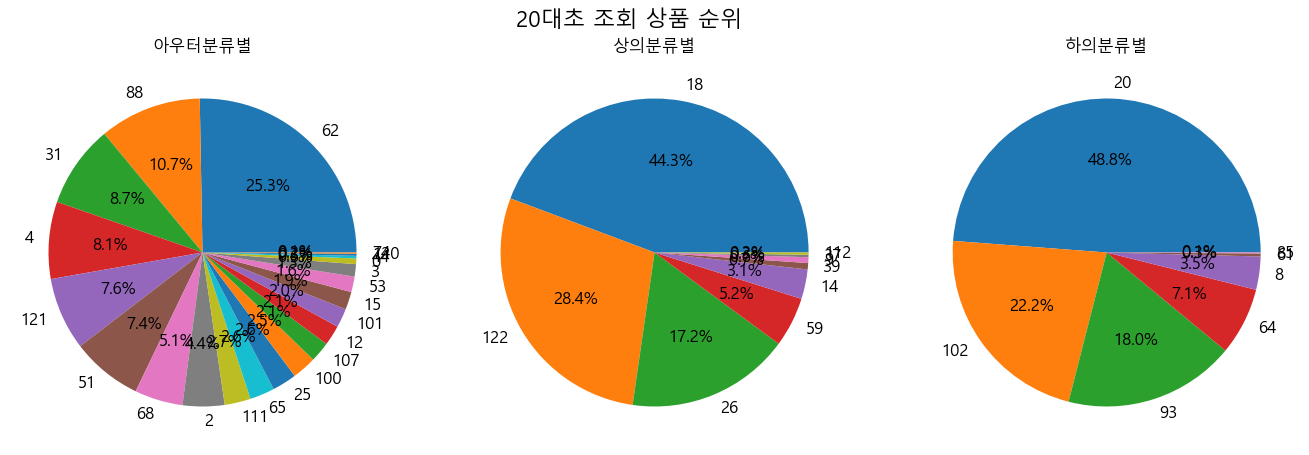

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

fig.suptitle('20대초 조회 상품 순위', fontsize=16, color='#000000')
plt.subplots_adjust(wspace = -0.3, hspace = 0.5)

ax1.pie(twen_1['20대초 조회'], labels=twen_1['분류'], autopct='%0.1f%%')
ax1.title.set_text("아우터분류별")
ax1.title.set_fontsize(12)
ax1.grid()

ax2.pie(twen_2['20대초 조회'], labels=twen_2['분류'], autopct='%0.1f%%')
ax2.title.set_text("상의분류별")
ax2.title.set_fontsize(12)
ax2.grid()

ax3.pie(twen_3['20대초 조회'], labels=twen_3['분류'], autopct='%0.1f%%')
ax3.title.set_text("하의분류별")
ax3.title.set_fontsize(12)
plt.grid()

txt = ""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 10, "weight": "light"})
plt.show()
plt.close()

### [3] 조회수에 따른 20대중 선호상품

In [35]:
age_1 = view_df.groupby('종류').sum()
age_1.sort_values(by='20대중 조회', ascending=False, inplace=True)
age1 = age_1.head(10)
print(age1)

age_2 = view_df.groupby('분류').sum()
age_2.sort_values(by='20대중 조회', ascending=False, inplace=True)
age_2
age2 = age_2.head(10)

      분류   18세이하 조회    20대초 조회    20대중 조회  20대후 30대초 조회  30대중후 조회   40대이상 조회
종류                                                                          
14  1257   683295.0  1869720.0  2063819.0     1468682.0  832346.0  1327048.0
6    436  1215550.0  1824363.0  1804824.0     1226079.0  643928.0  1093136.0
3    433   685200.0  1361380.0  1404468.0     1072480.0  642564.0   920378.0
9    208   160368.0   455588.0   573777.0      445898.0  279832.0   506645.0
13   527    71138.0   368475.0   475040.0      352522.0  200162.0   243022.0
17   479    48894.0   334252.0   291124.0      136355.0   53583.0    91097.0
0    721    96670.0   231348.0   224055.0      139880.0   82326.0   191159.0
11   739    61397.0   161553.0   217336.0      187614.0  125012.0   192185.0
2    412    74304.0   223995.0   177241.0      109262.0   60170.0    90889.0
15   351    53795.0   178545.0   170656.0       92657.0   42043.0    60438.0


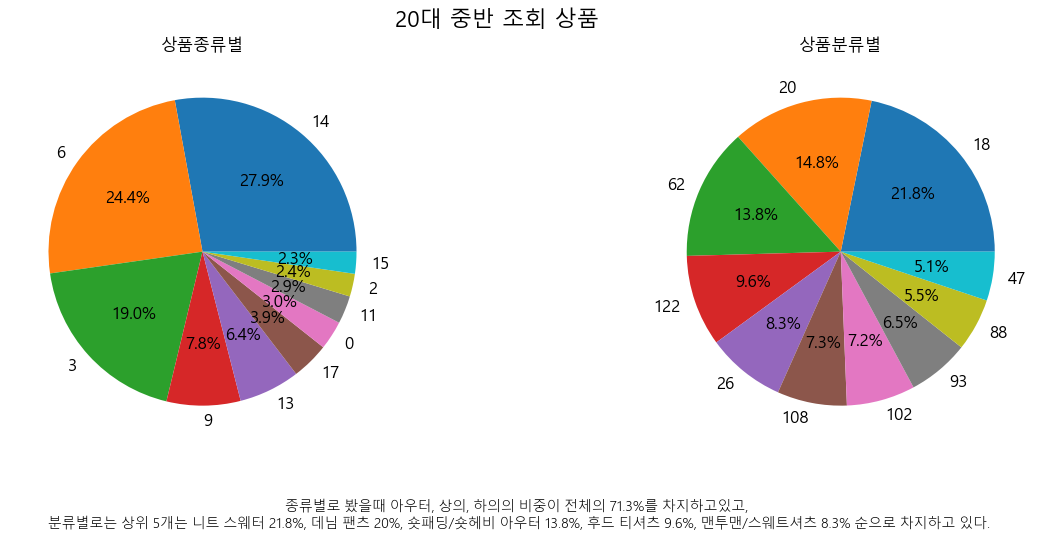

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# 전체 제목
fig.suptitle('20대 중반 조회 상품', fontsize=16, color='#000000')
plt.subplots_adjust(wspace = -0.3, hspace = 0.5)

ax1.pie(age1['20대중 조회'], labels=age1.index, autopct='%0.1f%%')
ax1.title.set_text("상품종류별")
ax1.title.set_fontsize(12)
ax1.grid()

ax2.pie(age2['20대중 조회'], labels=age2.index, autopct='%0.1f%%')
ax2.title.set_text("상품분류별")
ax2.title.set_fontsize(12)
plt.grid()

txt = "종류별로 봤을때 아우터, 상의, 하의의 비중이 전체의 71.3%를 차지하고있고,\n 분류별로는 상위 5개는 니트 스웨터 21.8%, 데님 팬츠 20%, 숏패딩/숏헤비 아우터 13.8%, 후드 티셔츠 9.6%, 맨투맨/스웨트셔츠 8.3% 순으로 차지하고 있다."
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 10, "weight": "light"})

plt.show()
plt.close()

#### 20대중 종류 조회수 top3에 따른 분류비율

In [37]:
twen_1 = view_df[view_df['종류'] == 14].sort_values(by='20대중 조회',ascending=False)
twen_2 = view_df[view_df['종류'] == 6].sort_values(by='20대중 조회',ascending=False)
twen_3 = view_df[view_df['종류'] == 3].sort_values(by='20대중 조회',ascending=False)
twen_2

,종류,분류,18세이하 조회,20대초 조회,20대중 조회,20대후 30대초 조회,30대중후 조회,40대이상 조회
39,6,18,345788.0,807960.0,892559.0,579460.0,259857.0,363807.0
45,6,122,586748.0,518697.0,393130.0,253978.0,151995.0,404586.0
40,6,26,216733.0,313674.0,339655.0,269147.0,168517.0,252789.0
43,6,59,27108.0,95210.0,107233.0,76586.0,40158.0,38719.0
38,6,14,21585.0,56783.0,41736.0,22635.0,11063.0,18079.0
37,6,9,9764.0,11077.0,12058.0,11951.0,6100.0,6254.0
42,6,39,4250.0,12066.0,11657.0,7945.0,4341.0,6442.0
44,6,112,2294.0,4268.0,4616.0,3549.0,1673.0,2016.0
41,6,37,1280.0,4628.0,2180.0,828.0,224.0,444.0


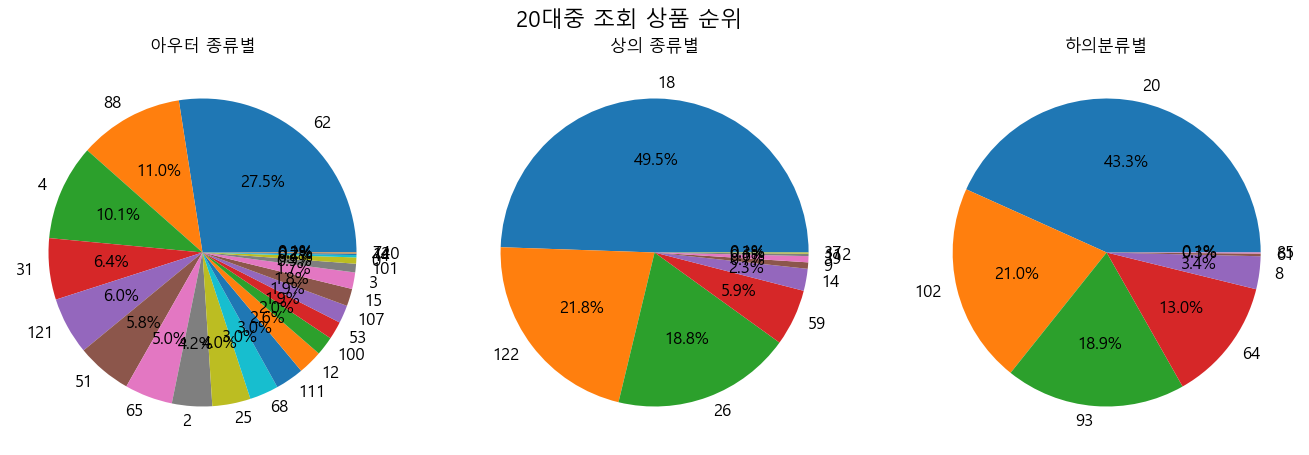

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

fig.suptitle('20대중 조회 상품 순위', fontsize=16, color='#000000')
plt.subplots_adjust(wspace = -0.3, hspace = 0.5)

ax1.pie(twen_1['20대중 조회'], labels=twen_1['분류'], autopct='%0.1f%%')
ax1.title.set_text("아우터 종류별")
ax1.title.set_fontsize(12)
ax1.grid()

ax2.pie(twen_2['20대중 조회'], labels=twen_2['분류'], autopct='%0.1f%%')
ax2.title.set_text("상의 종류별")
ax2.title.set_fontsize(12)
ax2.grid()

ax3.pie(twen_3['20대중 조회'], labels=twen_3['분류'], autopct='%0.1f%%')
ax3.title.set_text("하의분류별")
ax3.title.set_fontsize(12)
plt.grid()

txt = ""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 10, "weight": "light"})
plt.show()
plt.close()

### [4] 조회수에 따른 20대후 30대초 선호상품

In [39]:
age_1 = view_df.groupby('종류').sum()
age_1.sort_values(by='20대후 30대초 조회', ascending=False, inplace=True)
age1 = age_1.head(10)
print(age1)

age_2 = view_df.groupby('분류').sum()
age_2.sort_values(by='20대후 30대초 조회', ascending=False, inplace=True)
age_2
age2 = age_2.head(10)

      분류   18세이하 조회    20대초 조회    20대중 조회  20대후 30대초 조회  30대중후 조회   40대이상 조회
종류                                                                          
14  1257   683295.0  1869720.0  2063819.0     1468682.0  832346.0  1327048.0
6    436  1215550.0  1824363.0  1804824.0     1226079.0  643928.0  1093136.0
3    433   685200.0  1361380.0  1404468.0     1072480.0  642564.0   920378.0
9    208   160368.0   455588.0   573777.0      445898.0  279832.0   506645.0
13   527    71138.0   368475.0   475040.0      352522.0  200162.0   243022.0
11   739    61397.0   161553.0   217336.0      187614.0  125012.0   192185.0
0    721    96670.0   231348.0   224055.0      139880.0   82326.0   191159.0
17   479    48894.0   334252.0   291124.0      136355.0   53583.0    91097.0
2    412    74304.0   223995.0   177241.0      109262.0   60170.0    90889.0
15   351    53795.0   178545.0   170656.0       92657.0   42043.0    60438.0


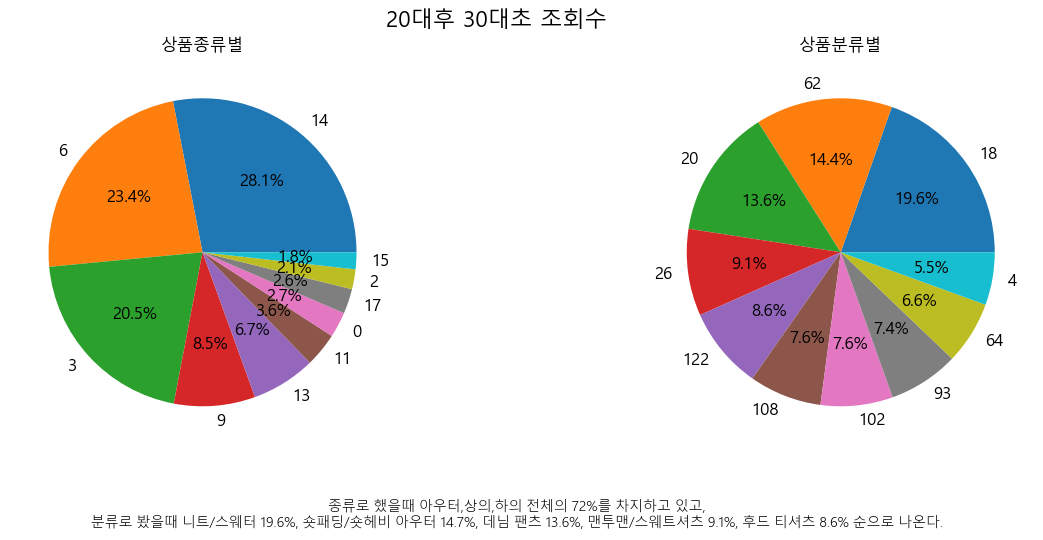

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# 전체 제목
fig.suptitle('20대후 30대초 조회수', fontsize=16, color='#000000')
plt.subplots_adjust(wspace = -0.3, hspace = 0.5)

ax1.pie(age1['20대후 30대초 조회'], labels=age1.index, autopct='%0.1f%%')
ax1.title.set_text("상품종류별")
ax1.title.set_fontsize(12)
ax1.grid()

ax2.pie(age2['20대후 30대초 조회'], labels=age2.index, autopct='%0.1f%%')
ax2.title.set_text("상품분류별")
ax2.title.set_fontsize(12)
plt.grid()

txt = "종류로 했을때 아우터,상의,하의 전체의 72%를 차지하고 있고,\n 분류로 봤을때 니트/스웨터 19.6%, 숏패딩/숏헤비 아우터 14.7%, 데님 팬츠 13.6%, 맨투맨/스웨트셔츠 9.1%, 후드 티셔츠 8.6% 순으로 나온다. "
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 10, "weight": "light"})

plt.show()
plt.close()

#### 20대후 30대초 종류 조회수 top3에 따른 분류비율

In [41]:
twen_1 = view_df[view_df['종류'] == 14].sort_values(by='20대후 30대초 조회',ascending=False)
twen_2 = view_df[view_df['종류'] == 6].sort_values(by='20대후 30대초 조회',ascending=False)
twen_3 = view_df[view_df['종류'] == 3].sort_values(by='20대후 30대초 조회',ascending=False)
twen_2

,종류,분류,18세이하 조회,20대초 조회,20대중 조회,20대후 30대초 조회,30대중후 조회,40대이상 조회
39,6,18,345788.0,807960.0,892559.0,579460.0,259857.0,363807.0
40,6,26,216733.0,313674.0,339655.0,269147.0,168517.0,252789.0
45,6,122,586748.0,518697.0,393130.0,253978.0,151995.0,404586.0
43,6,59,27108.0,95210.0,107233.0,76586.0,40158.0,38719.0
38,6,14,21585.0,56783.0,41736.0,22635.0,11063.0,18079.0
37,6,9,9764.0,11077.0,12058.0,11951.0,6100.0,6254.0
42,6,39,4250.0,12066.0,11657.0,7945.0,4341.0,6442.0
44,6,112,2294.0,4268.0,4616.0,3549.0,1673.0,2016.0
41,6,37,1280.0,4628.0,2180.0,828.0,224.0,444.0


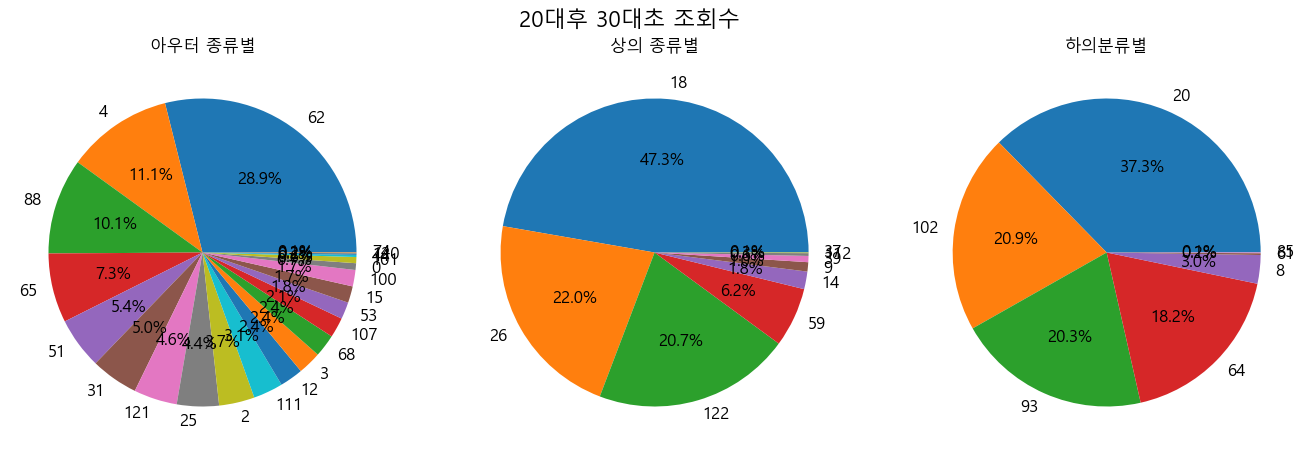

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

fig.suptitle('20대후 30대초 조회수', fontsize=16, color='#000000')
plt.subplots_adjust(wspace = -0.3, hspace = 0.5)

ax1.pie(twen_1['20대후 30대초 조회'], labels=twen_1['분류'], autopct='%0.1f%%')
ax1.title.set_text("아우터 종류별")
ax1.title.set_fontsize(12)
ax1.grid()

ax2.pie(twen_2['20대후 30대초 조회'], labels=twen_2['분류'], autopct='%0.1f%%')
ax2.title.set_text("상의 종류별")
ax2.title.set_fontsize(12)
ax2.grid()

ax3.pie(twen_3['20대후 30대초 조회'], labels=twen_3['분류'], autopct='%0.1f%%')
ax3.title.set_text("하의분류별")
ax3.title.set_fontsize(12)
plt.grid()

txt = ""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 10, "weight": "light"})
plt.show()
plt.close()

### [5] 조회수에 따른 30대중후 선호상품

In [43]:
age_1 = view_df.groupby('종류').sum()
age_1.sort_values(by='30대중후 조회', ascending=False, inplace=True)
age1 = age_1.head(10)
print(age1)

age_2 = view_df.groupby('분류').sum()
age_2.sort_values(by='30대중후 조회', ascending=False, inplace=True)
age_2
age2 = age_2.head(10)

      분류   18세이하 조회    20대초 조회    20대중 조회  20대후 30대초 조회  30대중후 조회   40대이상 조회
종류                                                                          
14  1257   683295.0  1869720.0  2063819.0     1468682.0  832346.0  1327048.0
6    436  1215550.0  1824363.0  1804824.0     1226079.0  643928.0  1093136.0
3    433   685200.0  1361380.0  1404468.0     1072480.0  642564.0   920378.0
9    208   160368.0   455588.0   573777.0      445898.0  279832.0   506645.0
13   527    71138.0   368475.0   475040.0      352522.0  200162.0   243022.0
11   739    61397.0   161553.0   217336.0      187614.0  125012.0   192185.0
0    721    96670.0   231348.0   224055.0      139880.0   82326.0   191159.0
2    412    74304.0   223995.0   177241.0      109262.0   60170.0    90889.0
17   479    48894.0   334252.0   291124.0      136355.0   53583.0    91097.0
5    711    50745.0   111031.0   121717.0       76817.0   48275.0    69862.0


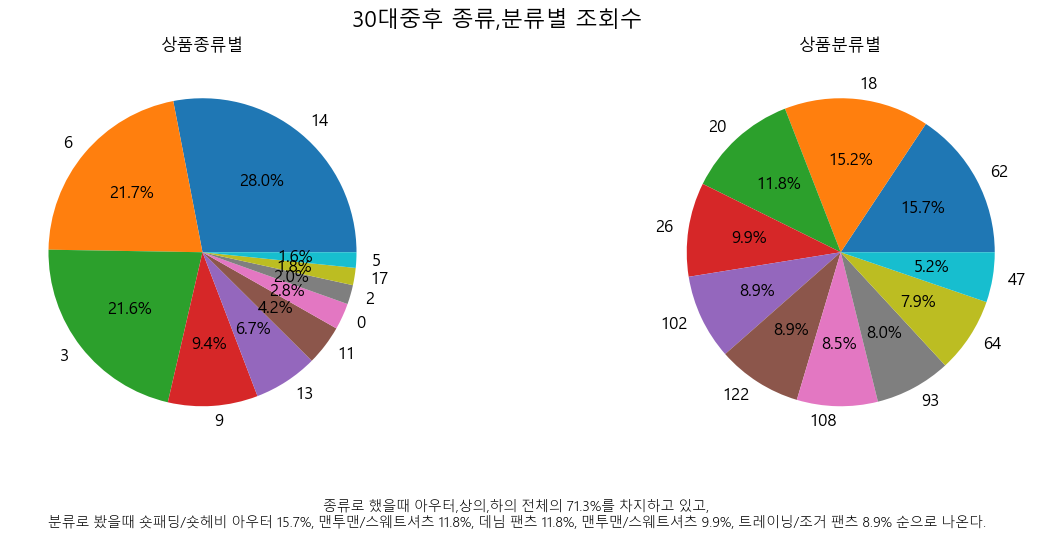

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# 전체 제목
fig.suptitle('30대중후 종류,분류별 조회수', fontsize=16, color='#000000')
plt.subplots_adjust(wspace = -0.3, hspace = 0.5)

ax1.pie(age1['30대중후 조회'], labels=age1.index, autopct='%0.1f%%')
ax1.title.set_text("상품종류별")
ax1.title.set_fontsize(12)
ax1.grid()

ax2.pie(age2['30대중후 조회'], labels=age2.index, autopct='%0.1f%%')
ax2.title.set_text("상품분류별")
ax2.title.set_fontsize(12)
plt.grid()

txt = "종류로 했을때 아우터,상의,하의 전체의 71.3%를 차지하고 있고,\n 분류로 봤을때 숏패딩/숏헤비 아우터 15.7%, 맨투맨/스웨트셔츠 11.8%, 데님 팬츠 11.8%, 맨투맨/스웨트셔츠 9.9%, 트레이닝/조거 팬츠 8.9% 순으로 나온다. "
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 10, "weight": "light"})

plt.show()
plt.close()

#### 30대중후 종류 조회수 top3에 따른 분류비율

In [45]:
twen_1 = view_df[view_df['종류'] == 14].sort_values(by='30대중후 조회',ascending=False)
twen_2 = view_df[view_df['종류'] == 6].sort_values(by='30대중후 조회',ascending=False)
twen_3 = view_df[view_df['종류'] == 3].sort_values(by='30대중후 조회',ascending=False)
twen_2

,종류,분류,18세이하 조회,20대초 조회,20대중 조회,20대후 30대초 조회,30대중후 조회,40대이상 조회
39,6,18,345788.0,807960.0,892559.0,579460.0,259857.0,363807.0
40,6,26,216733.0,313674.0,339655.0,269147.0,168517.0,252789.0
45,6,122,586748.0,518697.0,393130.0,253978.0,151995.0,404586.0
43,6,59,27108.0,95210.0,107233.0,76586.0,40158.0,38719.0
38,6,14,21585.0,56783.0,41736.0,22635.0,11063.0,18079.0
37,6,9,9764.0,11077.0,12058.0,11951.0,6100.0,6254.0
42,6,39,4250.0,12066.0,11657.0,7945.0,4341.0,6442.0
44,6,112,2294.0,4268.0,4616.0,3549.0,1673.0,2016.0
41,6,37,1280.0,4628.0,2180.0,828.0,224.0,444.0


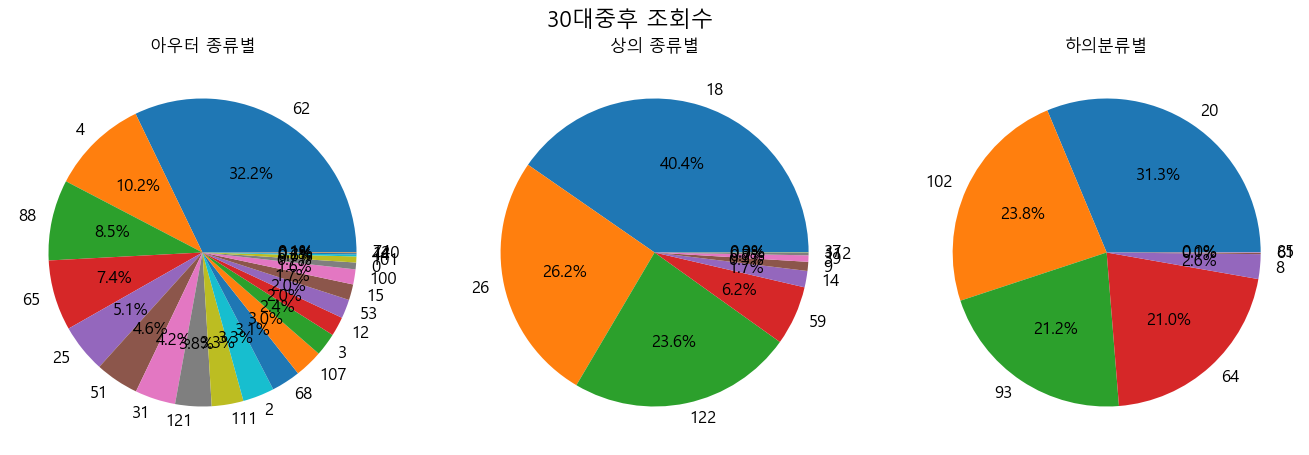

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

fig.suptitle('30대중후 조회수', fontsize=16, color='#000000')
plt.subplots_adjust(wspace = -0.3, hspace = 0.5)

ax1.pie(twen_1['30대중후 조회'], labels=twen_1['분류'], autopct='%0.1f%%')
ax1.title.set_text("아우터 종류별")
ax1.title.set_fontsize(12)
ax1.grid()

ax2.pie(twen_2['30대중후 조회'], labels=twen_2['분류'], autopct='%0.1f%%')
ax2.title.set_text("상의 종류별")
ax2.title.set_fontsize(12)
ax2.grid()

ax3.pie(twen_3['30대중후 조회'], labels=twen_3['분류'], autopct='%0.1f%%')
ax3.title.set_text("하의분류별")
ax3.title.set_fontsize(12)
plt.grid()

txt = ""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 10, "weight": "light"})
plt.show()
plt.close()

### [6] 조회수에 따른 30대중후 선호상품

In [47]:
age_1 = view_df.groupby('종류').sum()
age_1.sort_values(by='40대이상 조회', ascending=False, inplace=True)
age1 = age_1.head(10)
print(age1)

age_2 = view_df.groupby('분류').sum()
age_2.sort_values(by='40대이상 조회', ascending=False, inplace=True)
age_2
age2 = age_2.head(10)

      분류   18세이하 조회    20대초 조회    20대중 조회  20대후 30대초 조회  30대중후 조회   40대이상 조회
종류                                                                          
14  1257   683295.0  1869720.0  2063819.0     1468682.0  832346.0  1327048.0
6    436  1215550.0  1824363.0  1804824.0     1226079.0  643928.0  1093136.0
3    433   685200.0  1361380.0  1404468.0     1072480.0  642564.0   920378.0
9    208   160368.0   455588.0   573777.0      445898.0  279832.0   506645.0
13   527    71138.0   368475.0   475040.0      352522.0  200162.0   243022.0
11   739    61397.0   161553.0   217336.0      187614.0  125012.0   192185.0
0    721    96670.0   231348.0   224055.0      139880.0   82326.0   191159.0
17   479    48894.0   334252.0   291124.0      136355.0   53583.0    91097.0
2    412    74304.0   223995.0   177241.0      109262.0   60170.0    90889.0
5    711    50745.0   111031.0   121717.0       76817.0   48275.0    69862.0


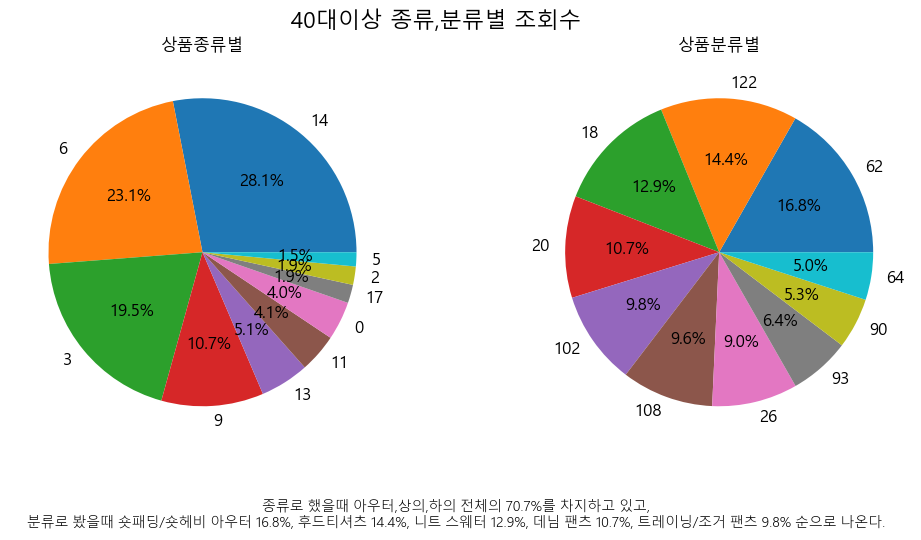

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# 전체 제목
fig.suptitle('40대이상 종류,분류별 조회수', fontsize=16, color='#000000')
plt.subplots_adjust(wspace = -0.5, hspace = 0.5)

ax1.pie(age1['40대이상 조회'], labels=age1.index, autopct='%0.1f%%')
ax1.title.set_text("상품종류별")
ax1.title.set_fontsize(12)
ax1.grid()

ax2.pie(age2['40대이상 조회'], labels=age2.index, autopct='%0.1f%%')
ax2.title.set_text("상품분류별")
ax2.title.set_fontsize(12)
plt.grid()

txt = "종류로 했을때 아우터,상의,하의 전체의 70.7%를 차지하고 있고,\n 분류로 봤을때 숏패딩/숏헤비 아우터 16.8%, 후드티셔츠 14.4%, 니트 스웨터 12.9%, 데님 팬츠 10.7%, 트레이닝/조거 팬츠 9.8% 순으로 나온다. "
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 10, "weight": "light"})

plt.show()
plt.close()

#### 40대이상 종류 조회수 top3에 따른 분류비율

In [49]:
twen_1 = view_df[view_df['종류'] == 14].sort_values(by='40대이상 조회',ascending=False)
twen_2 = view_df[view_df['종류'] == 6].sort_values(by='40대이상 조회',ascending=False)
twen_3 = view_df[view_df['종류'] == 3].sort_values(by='40대이상 조회',ascending=False)
twen_2

,종류,분류,18세이하 조회,20대초 조회,20대중 조회,20대후 30대초 조회,30대중후 조회,40대이상 조회
45,6,122,586748.0,518697.0,393130.0,253978.0,151995.0,404586.0
39,6,18,345788.0,807960.0,892559.0,579460.0,259857.0,363807.0
40,6,26,216733.0,313674.0,339655.0,269147.0,168517.0,252789.0
43,6,59,27108.0,95210.0,107233.0,76586.0,40158.0,38719.0
38,6,14,21585.0,56783.0,41736.0,22635.0,11063.0,18079.0
42,6,39,4250.0,12066.0,11657.0,7945.0,4341.0,6442.0
37,6,9,9764.0,11077.0,12058.0,11951.0,6100.0,6254.0
44,6,112,2294.0,4268.0,4616.0,3549.0,1673.0,2016.0
41,6,37,1280.0,4628.0,2180.0,828.0,224.0,444.0


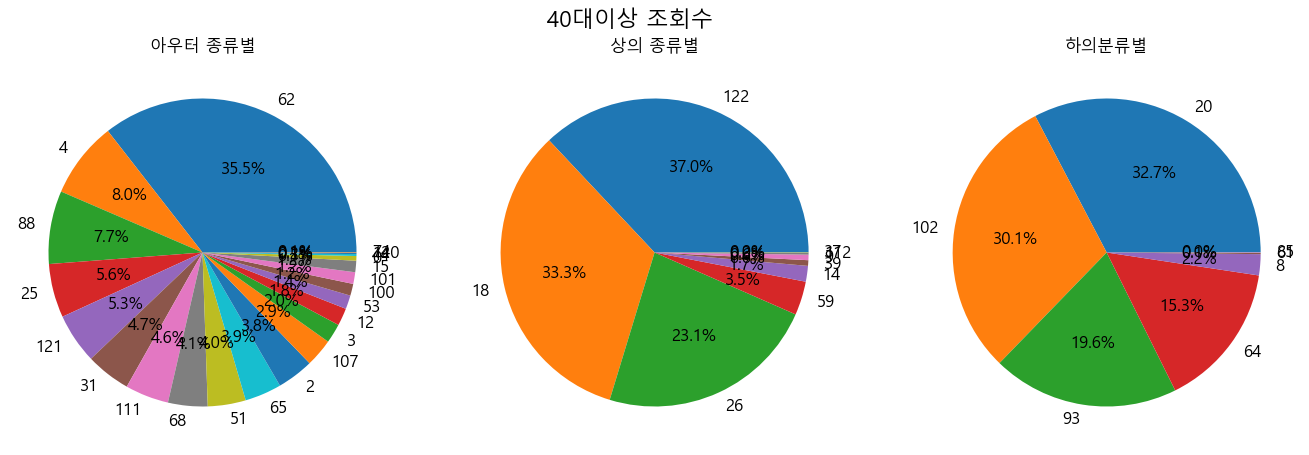

In [50]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

fig.suptitle('40대이상 조회수', fontsize=16, color='#000000')
plt.subplots_adjust(wspace = -0.3, hspace = 0.5)

ax1.pie(twen_1['40대이상 조회'], labels=twen_1['분류'], autopct='%0.1f%%')
ax1.title.set_text("아우터 종류별")
ax1.title.set_fontsize(12)
ax1.grid()

ax2.pie(twen_2['40대이상 조회'], labels=twen_2['분류'], autopct='%0.1f%%')
ax2.title.set_text("상의 종류별")
ax2.title.set_fontsize(12)
ax2.grid()

ax3.pie(twen_3['40대이상 조회'], labels=twen_3['분류'], autopct='%0.1f%%')
ax3.title.set_text("하의분류별")
ax3.title.set_fontsize(12)
plt.grid()

txt = ""
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 10, "weight": "light"})
plt.show()
plt.close()

## #04. 시각화 - 막대그래프

In [89]:
new_df = new_type_df.groupby('종류').sum()
new_df[['조회수', '구매수']] = new_df[['조회수', '구매수']] / 1000
new_df.sort_values(by='조회수', ascending=False, inplace=True)
new_df = new_df.head(10)
print(new_df)

       분류       조회수       구매수   18세이하 조회    20대초 조회    20대중 조회  20대후 30대초 조회  \
종류                                                                             
14  83458  8239.121   779.921   683295.0  1869720.0  2063819.0     1468682.0   
6   74463  7799.517  1306.869  1215550.0  1824363.0  1804824.0     1226079.0   
3   64368  6082.016  1259.856   685200.0  1361380.0  1404468.0     1072480.0   
9   34924  2420.621   333.455   160368.0   455588.0   573777.0      445898.0   
13  12587  1709.306   197.823    71138.0   368475.0   475040.0      352522.0   
0   10607   964.345   166.470    96670.0   231348.0   224055.0      139880.0   
17  11388   954.450   112.493    48894.0   334252.0   291124.0      136355.0   
11  16692   944.227   129.487    61397.0   161553.0   217336.0      187614.0   
2    8830   735.082   152.819    74304.0   223995.0   177241.0      109262.0   
15   3609   597.672    82.976    53795.0   178545.0   170656.0       92657.0   

    30대중후 조회   40대이상 조회  18세이하 구매   20대

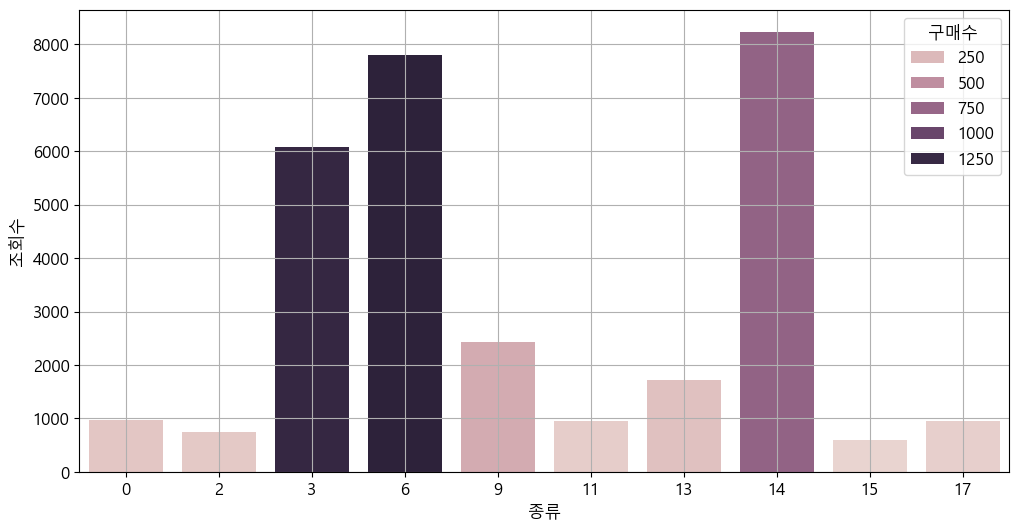

In [90]:
plt.figure()
sb.barplot(data=new_df, x='종류', y='조회수', hue='구매수', estimator='median')
plt.grid()
plt.show()
plt.close()

In [91]:
new_df = new_type_df.groupby('종류').sum()
new_df[['조회수', '구매수']] = new_df[['조회수', '구매수']] / 1000
new_df.sort_values(by='구매수', ascending=False, inplace=True)
new_df = new_df.head(10)
print(new_df)

       분류       조회수       구매수   18세이하 조회    20대초 조회    20대중 조회  20대후 30대초 조회  \
종류                                                                             
6   74463  7799.517  1306.869  1215550.0  1824363.0  1804824.0     1226079.0   
3   64368  6082.016  1259.856   685200.0  1361380.0  1404468.0     1072480.0   
14  83458  8239.121   779.921   683295.0  1869720.0  2063819.0     1468682.0   
9   34924  2420.621   333.455   160368.0   455588.0   573777.0      445898.0   
13  12587  1709.306   197.823    71138.0   368475.0   475040.0      352522.0   
5   11627   477.964   186.651    50745.0   111031.0   121717.0       76817.0   
0   10607   964.345   166.470    96670.0   231348.0   224055.0      139880.0   
2    8830   735.082   152.819    74304.0   223995.0   177241.0      109262.0   
11  16692   944.227   129.487    61397.0   161553.0   217336.0      187614.0   
17  11388   954.450   112.493    48894.0   334252.0   291124.0      136355.0   

    30대중후 조회   40대이상 조회  18세이하 구매   20대

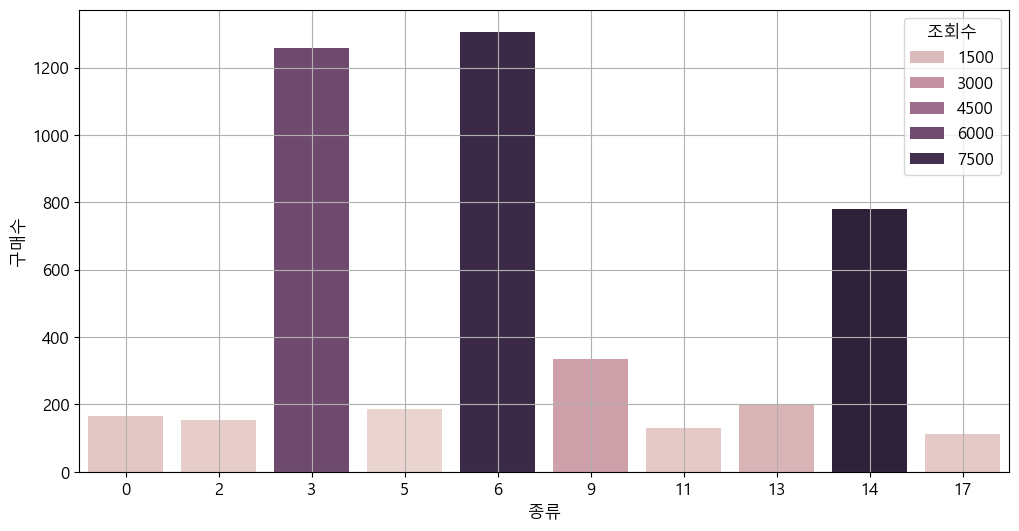

In [92]:
plt.figure()
sb.barplot(data=new_df, x='종류', y='구매수', hue='조회수', estimator='median')
plt.grid()
plt.show()
plt.close()

In [121]:
new_df = new_type_df.groupby('분류').sum()
new_df[['조회수', '구매수']] = new_df[['조회수', '구매수']] / 1000
new_df.sort_values(by='구매수', ascending=False, inplace=True)
new_df = new_df.head(10)
print(new_df)

           상품번호    종류       조회수      구매수  18세이하 조회   20대초 조회   20대중 조회  \
분류                                                                       
20   1218915493  1326  2499.798  507.422  327269.0  664340.0  607726.0   
122  1196839102  2490  2305.422  454.339  586748.0  518697.0  393130.0   
18   1726045182  3336  3246.937  348.536  345788.0  807960.0  892559.0   
26    816848863  1734  1558.857  311.987  216733.0  313674.0  339655.0   
102   718662303   792  1439.939  308.709  190259.0  302523.0  295027.0   
64    324872956   426   776.942  211.681   28538.0   96524.0  181996.0   
93    559745320   612  1164.245  208.243  119470.0  244931.0  265851.0   
108   660338504  1917  1291.497  147.059   94442.0  257150.0  299661.0   
62   1226461846  5348  2371.372  145.088  169524.0  472766.0  566730.0   
90    330427928  1107   695.003  123.344   48297.0  127002.0  161452.0   

     20대후 30대초 조회  30대중후 조회  40대이상 조회  18세이하 구매   20대초 구매   20대중 구매  \
분류                                      

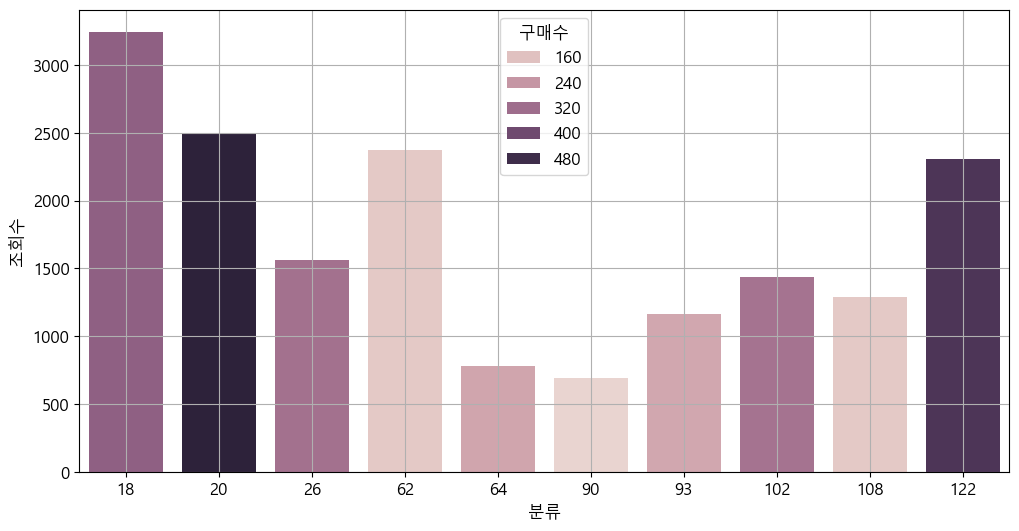

In [123]:
plt.figure()
sb.barplot(data=new_df, x='분류', y='조회수', hue='구매수', estimator='median')
plt.grid()
plt.show()
plt.close()

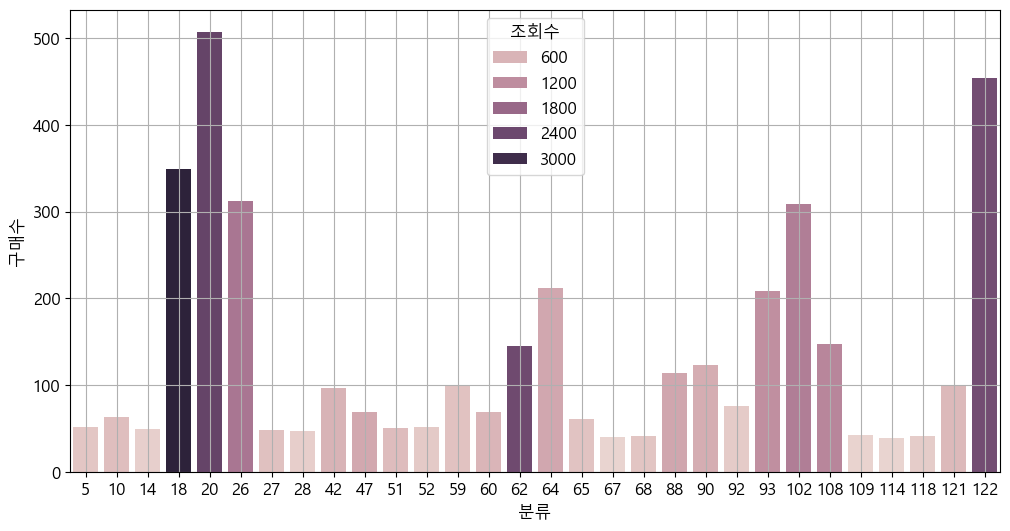

In [108]:
plt.figure()
sb.barplot(data=new_df, x='분류', y='구매수', hue='조회수', estimator='median')
plt.grid()
plt.show()
plt.close()